# TLC Trip Record Data Prediction
---

### Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

import random

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df1= pd.read_csv('green_tripdata-one-.csv')
df1

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           2.0  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1           2.0  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2           2.0  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3           2.0  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
4           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
...         ...                  ...                   ...                ...   
76513       NaN  2021-01-15 10:35:00   2021-01-15 10:51:00                NaN   
76514       NaN  2021-01-15 10:25:00   2021-01-15 10:34:00                NaN   
76515       NaN  2021-01-15 10:16:00   2021-01-15 10:20:00                NaN   
76516       NaN  2021-01-15 10:16:00   2021-01-15 10:58:00                NaN   
76517       NaN  2021-01-15 10:24:00   2021-01-15 10:46:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0            43           151              1.0           1.01   
1             1.0           166           239              1.0           2.53   
2             1.0            41            42              1.0           1.12   
3             1.0           168            75              1.0           1.99   
4             2.0           265           265              3.0           0.00   
...           ...           ...           ...              ...            ...   
76513         NaN             3           147              NaN           5.97   
76514         NaN           242           213              NaN           3.83   
76515         NaN           181           181              NaN           0.45   
76516         NaN           244            72              NaN          22.21   
76517         NaN           227            33              NaN           4.20   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0             5.50    0.5      0.5        0.00          0.00        NaN   
1            10.00    0.5      0.5        2.81          0.00        NaN   
2             6.00    0.5      0.5        1.00          0.00        NaN   
3             8.00    0.5      0.5        0.00          0.00        NaN   
4           -52.00    0.0     -0.5        0.00          0.00        NaN   
...            ...    ...      ...         ...           ...        ...   
76513        17.01    0.0      0.0        0.00          0.00        NaN   
76514        27.27    0.0      0.0        2.75          0.00        NaN   
76515        12.89    0.0      0.0        2.75          0.00        NaN   
76516        50.67    0.0      0.0        2.75          6.12        NaN   
76517        21.37    0.0      0.0        2.75          0.00        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                        0.3          6.80           2.0        1.0   
1                        0.3         16.86           1.0        1.0   
2                        0.3          8.30           1.0        1.0   
3                        0.3          9.30           2.0        1.0   
4                       -0.3        -52.80           3.0        1.0   
...                      ...           ...           ...        ...   
76513                    0.3         17.31           NaN        NaN   
76514                    0.3         30.32           NaN        NaN   
76515                    0.3         15.94           NaN        NaN   
76516                    0.3         59.84           NaN        NaN   
76517                    0.3         24.42           NaN        NaN   

       congestion_surcharge  
0                      0.00  
1                      2.75  
2                      0.00  
3                      0.00  
4                      0.00  
...                     ...  
76513                   NaN  
76514                   NaN  
76515                   NaN  
76516  

In [3]:
df2= pd.read_csv('green_tripdata_two-.csv')
df2

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           2.0  2021-02-01 00:34:03   2021-02-01 00:51:58                  N   
1           2.0  2021-02-01 00:04:00   2021-02-01 00:10:30                  N   
2           2.0  2021-02-01 00:18:51   2021-02-01 00:34:06                  N   
3           2.0  2021-02-01 00:53:27   2021-02-01 01:11:41                  N   
4           2.0  2021-02-01 00:57:46   2021-02-01 01:06:44                  N   
...         ...                  ...                   ...                ...   
64567       NaN  2021-02-26 08:46:00   2021-02-26 08:59:00                NaN   
64568       NaN  2021-02-26 08:56:00   2021-02-26 09:10:00                NaN   
64569       NaN  2021-02-26 08:46:00   2021-02-26 09:07:00                NaN   
64570       NaN  2021-02-26 08:17:00   2021-02-26 08:51:00                NaN   
64571       NaN  2021-02-26 08:12:00   2021-02-26 08:29:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0           130           205              5.0           3.66   
1             1.0           152           244              1.0           1.10   
2             1.0           152            48              1.0           4.93   
3             1.0           152           241              1.0           6.70   
4             1.0            75            42              1.0           1.89   
...           ...           ...           ...              ...            ...   
64567         NaN           167           247              NaN           1.47   
64568         NaN            89           123              NaN           2.87   
64569         NaN           127           166              NaN           4.74   
64570         NaN            42           137              NaN           7.63   
64571         NaN            74           236              NaN           1.69   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0            14.00   0.50      0.5       10.00           0.0        NaN   
1             6.50   0.50      0.5        0.00           0.0        NaN   
2            16.50   0.50      0.5        0.00           0.0        NaN   
3            21.00   0.50      0.5        0.00           0.0        NaN   
4             8.50   0.50      0.5        2.45           0.0        NaN   
...            ...    ...      ...         ...           ...        ...   
64567        14.55   2.75      0.0        0.00           0.0        NaN   
64568        20.22   2.75      0.0        0.00           0.0        NaN   
64569        24.94   5.50      0.0        0.00           0.0        NaN   
64570        41.81   2.75      0.0        0.00           0.0        NaN   
64571        16.58   2.75      0.0        0.00           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                        0.3         25.30           1.0        1.0   
1                        0.3          7.80           2.0        1.0   
2                        0.3         20.55           2.0        1.0   
3                        0.3         22.30           2.0        1.0   
4                        0.3         12.25           1.0        1.0   
...                      ...           ...           ...        ...   
64567                    0.3         17.60           NaN        NaN   
64568                    0.3         23.27           NaN        NaN   
64569                    0.3         30.74           NaN        NaN   
64570                    0.3         44.86           NaN        NaN   
64571                    0.3         19.63           NaN        NaN   

       congestion_surcharge  
0                      0.00  
1                      0.00  
2                      2.75  
3                      0.00  
4                      0.00  
...                     ...  
64567                   NaN  
64568                   NaN  
64569                   NaN  
64570  

In [4]:
con_data= pd.concat([df1,df2])   # concat two dataset
con_data.head(10)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2.0  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1       2.0  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2       2.0  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3       2.0  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
4       2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
5       2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
6       2.0  2021-01-01 00:19:14   2021-01-01 00:19:21                  N   
7       2.0  2021-01-01 00:26:31   2021-01-01 00:28:50                  N   
8       2.0  2021-01-01 00:57:46   2021-01-01 00:57:57                  N   
9       2.0  2021-01-01 00:58:32   2021-01-01 01:32:34                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           151              1.0           1.01   
1         1.0           166           239              1.0           2.53   
2         1.0            41            42              1.0           1.12   
3         1.0           168            75              1.0           1.99   
4         2.0           265           265              3.0           0.00   
5         2.0           265           265              3.0           0.00   
6         5.0           265           265              1.0           0.00   
7         1.0            75            75              6.0           0.45   
8         1.0           225           225              1.0           0.00   
9         1.0           225           265              1.0          12.19   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0          5.5    0.5      0.5        0.00           0.0        NaN   
1         10.0    0.5      0.5        2.81           0.0        NaN   
2          6.0    0.5      0.5        1.00           0.0        NaN   
3          8.0    0.5      0.5        0.00           0.0        NaN   
4        -52.0    0.0     -0.5        0.00           0.0        NaN   
5         52.0    0.0      0.5        0.00           0.0        NaN   
6        180.0    0.0      0.0       36.06           0.0        NaN   
7          3.5    0.5      0.5        0.96           0.0        NaN   
8          2.5    0.5      0.5        0.00           0.0        NaN   
9         38.0    0.5      0.5        2.75           0.0        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          6.80           2.0        1.0   
1                    0.3         16.86           1.0        1.0   
2                    0.3          8.30           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                   -0.3        -52.80           3.0        1.0   
5                    0.3         52.80           2.0        1.0   
6                    0.3        216.36           1.0        2.0   
7                    0.3          5.76           1.0        1.0   
8                    0.3          3.80           2.0        1.0   
9                    0.3         42.05           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  2.75  
2                  0.00  
3                  0.00  
4                  0.00  
5                  0.00  
6                  0.00  
7                  0.00  
8                  0.00  
9                  0.00

In [5]:
con_data.shape

(141090, 20)

In [6]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141090 entries, 0 to 64571
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               75934 non-null   float64
 1   lpep_pickup_datetime   141090 non-null  object 
 2   lpep_dropoff_datetime  141090 non-null  object 
 3   store_and_fwd_flag     75934 non-null   object 
 4   RatecodeID             75934 non-null   float64
 5   PULocationID           141090 non-null  int64  
 6   DOLocationID           141090 non-null  int64  
 7   passenger_count        75934 non-null   float64
 8   trip_distance          141090 non-null  float64
 9   fare_amount            141090 non-null  float64
 10  extra                  141090 non-null  float64
 11  mta_tax                141090 non-null  float64
 12  tip_amount             141090 non-null  float64
 13  tolls_amount           141090 non-null  float64
 14  ehail_fee              0 non-null    

In [7]:
# con_data = con_data.sample(frac=1,random_state=79).reset_index(drop=True)

In [8]:
duplicate = con_data.duplicated()
print(duplicate.sum())
con_data[duplicate]

0


Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

In [9]:
# Simple Validation Method
con_data_train , con_data_test = train_test_split(con_data, train_size=0.2, random_state=199)

In [10]:
con_data_train2, con_data_val = train_test_split(con_data_train, test_size=0.2, random_state=199)

## Relation Between Features

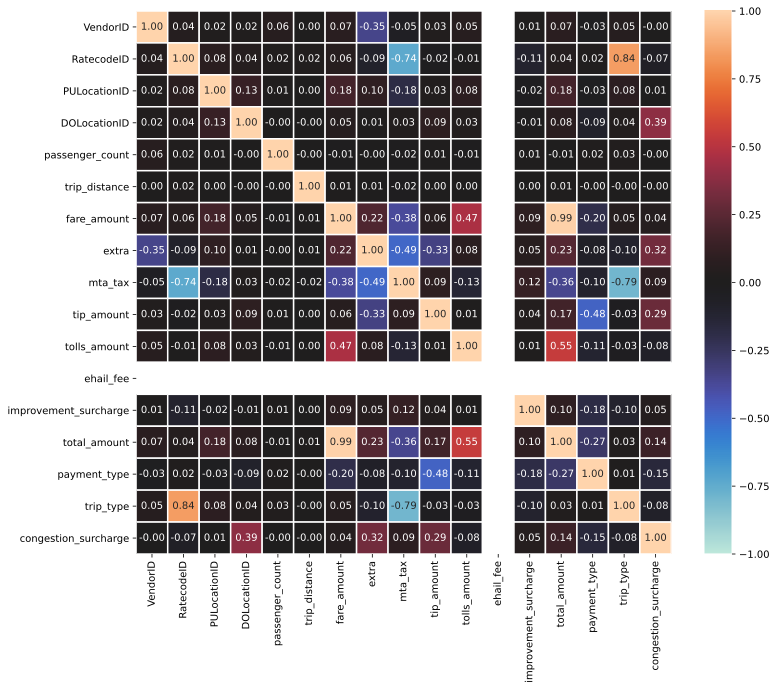

In [80]:
plt.rcParams["figure.figsize"] = (12,10);
sns.heatmap(con_data.corr(), cmap = 'icefire', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f');

In [12]:
# convert type to datetime
con_data_train2['lpep_pickup_datetime']= pd.to_datetime(con_data_train2['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

# convert type to datetime
con_data_val['lpep_pickup_datetime']= pd.to_datetime(con_data_val['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

# convert type to datetime
con_data_train2['lpep_dropoff_datetime']= pd.to_datetime(con_data_train2['lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S") 


# convert type to datetime
con_data_val['lpep_dropoff_datetime']= pd.to_datetime(con_data_val['lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S") 

In [13]:
con_data_train2.dtypes

VendorID                        float64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [14]:
con_data_val.dtypes

VendorID                        float64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [15]:
# for train
#extract month

con_data_train2["month_pickup"] = pd.DatetimeIndex(con_data_train2["lpep_pickup_datetime"]).month

#extract week day 
con_data_train2["week_day_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.weekday

#extract day 
con_data_train2["day_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.day

#extract hour
con_data_train2["hour_pickup"]= con_data_train2["lpep_pickup_datetime"].dt.hour 

con_data_train2 =con_data_train2.sort_values(by = "lpep_pickup_datetime",ascending = True)

In [16]:
# for val
#extract month

con_data_val["month_pickup"] = pd.DatetimeIndex(con_data_val["lpep_pickup_datetime"]).month

#extract week day 
con_data_val["week_day_pickup"]= con_data_val["lpep_pickup_datetime"].dt.weekday

#extract day 
con_data_val["day_pickup"]= con_data_val["lpep_pickup_datetime"].dt.day

#extract hour
con_data_val["hour_pickup"]= con_data_val["lpep_pickup_datetime"].dt.hour 

con_data_val =con_data_val.sort_values(by = "lpep_pickup_datetime",ascending = True)

In [17]:
# for train
#extract month

con_data_train2["month_dropoff"] = pd.DatetimeIndex(con_data_train2["lpep_dropoff_datetime"]).month

#extract week day 
con_data_train2["week_day_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.weekday

#extract day 
con_data_train2["day_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.day

#extract hour
con_data_train2["hour_dropoff"]= con_data_train2["lpep_dropoff_datetime"].dt.hour 

con_data_train2 =con_data_train2.sort_values(by = "lpep_dropoff_datetime",ascending = True)

In [18]:
# for val
#extract month

con_data_val["month_dropoff"] = pd.DatetimeIndex(con_data_val["lpep_dropoff_datetime"]).month

#extract week day 
con_data_val["week_day_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.weekday

#extract day 
con_data_val["day_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.day

#extract hour
con_data_val["hour_dropoff"]= con_data_val["lpep_dropoff_datetime"].dt.hour 

con_data_val =con_data_val.sort_values(by = "lpep_dropoff_datetime",ascending = True)

In [19]:
con_data_train2.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
4           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
5           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
40813       NaN  2021-01-01 00:17:00   2021-01-01 00:46:00                NaN   
40819       NaN  2021-01-01 00:36:00   2021-01-01 00:51:00                NaN   
2           2.0  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
4             2.0           265           265              3.0           0.00   
5             2.0           265           265              3.0           0.00   
40813         NaN            17           237              NaN           9.31   
40819         NaN            47            51              NaN           8.61   
2             1.0            41            42              1.0           1.12   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
4           -52.00  ...        1.0                   0.0             1   
5            52.00  ...        1.0                   0.0             1   
40813        31.65  ...        NaN                   NaN             1   
40819        33.66  ...        NaN                   NaN             1   
2             6.00  ...        1.0                   0.0             1   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
4                    4           1            0              1   
5                    4           1            0              1   
40813                4           1            0              1   
40819                4           1            0              1   
2                    4           1            0              1   

       week_day_dropoff  day_dropoff  hour_dropoff  
4                     4            1             0  
5                     4            1             0  
40813                 4            1             0  
40819                 4            1             0  
2                     4            1             0  

[5 rows x 28 columns]

In [20]:
con_data_val.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
27          2.0  2021-01-01 00:15:41   2021-01-01 00:18:57                  N   
0           2.0  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
40820       NaN  2021-01-01 00:06:00   2021-01-01 00:39:00                NaN   
40829       NaN  2021-01-01 01:38:00   2021-01-01 01:57:00                NaN   
70          2.0  2021-01-01 03:23:00   2021-01-01 03:35:59                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
27            1.0           166            41              1.0           0.65   
0             1.0            43           151              1.0           1.01   
40820         NaN            39           225              NaN           6.27   
40829         NaN            17            76              NaN           4.86   
70            1.0            41           142              5.0           3.52   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
27            4.50  ...        1.0                  0.00             1   
0             5.50  ...        1.0                  0.00             1   
40820        32.95  ...        NaN                   NaN             1   
40829        23.31  ...        NaN                   NaN             1   
70           13.00  ...        1.0                  2.75             1   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
27                   4           1            0              1   
0                    4           1            0              1   
40820                4           1            0              1   
40829                4           1            1              1   
70                   4           1            3              1   

       week_day_dropoff  day_dropoff  hour_dropoff  
27                    4            1             0  
0                     4            1             0  
40820                 4            1             0  
40829                 4            1             1  
70                    4            1             3  

[5 rows x 28 columns]

In [21]:
con_data_train2.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'month_pickup', 'week_day_pickup', 'day_pickup', 'hour_pickup',
       'month_dropoff', 'week_day_dropoff', 'day_dropoff', 'hour_dropoff'],
      dtype='object')

In [22]:
con_data_val.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'month_pickup', 'week_day_pickup', 'day_pickup', 'hour_pickup',
       'month_dropoff', 'week_day_dropoff', 'day_dropoff', 'hour_dropoff'],
      dtype='object')

In [23]:
date = pd.Timestamp(2021,1,1)
con_data_train2 = con_data_train2[con_data_train2['lpep_pickup_datetime'] >= date ]
con_data_train2

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
4           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
5           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
40813       NaN  2021-01-01 00:17:00   2021-01-01 00:46:00                NaN   
40819       NaN  2021-01-01 00:36:00   2021-01-01 00:51:00                NaN   
2           2.0  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
...         ...                  ...                   ...                ...   
60289       NaN  2021-02-28 22:01:00   2021-02-28 22:16:00                NaN   
35436       1.0  2021-02-28 22:25:59   2021-02-28 22:40:43                  N   
35429       2.0  2021-02-28 22:38:00   2021-02-28 22:42:29                  N   
35457       2.0  2021-02-28 23:25:49   2021-02-28 23:41:53                  N   
60298       NaN  2021-02-28 23:44:00   2021-02-28 23:58:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
4             2.0           265           265              3.0           0.00   
5             2.0           265           265              3.0           0.00   
40813         NaN            17           237              NaN           9.31   
40819         NaN            47            51              NaN           8.61   
2             1.0            41            42              1.0           1.12   
...           ...           ...           ...              ...            ...   
60289         NaN           174           213              NaN           0.00   
35436         1.0            75             7              1.0           5.30   
35429         1.0             7           146              1.0           1.04   
35457         1.0            41           234              1.0           5.30   
60298         NaN            74           151              NaN           2.40   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
4           -52.00  ...        1.0                  0.00             1   
5            52.00  ...        1.0                  0.00             1   
40813        31.65  ...        NaN                   NaN             1   
40819        33.66  ...        NaN                   NaN             1   
2             6.00  ...        1.0                  0.00             1   
...            ...  ...        ...                   ...           ...   
60289        29.45  ...        NaN                   NaN             2   
35436        17.00  ...        1.0                  0.00             2   
35429         5.50  ...        1.0                  0.00             2   
35457        17.00  ...        1.0                  2.75             2   
60298        12.61  ...        NaN                   NaN             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
4                    4           1            0              1   
5                    4           1            0              1   
40813                4           1            0              1   
40819                4           1            0              1   
2                    4           1            0              1   
...                ...         ...          ...            ...   
60289                6          28           22              2   
35436                6          28           22              2   
35429                6          28           22              2   
35457                6          28           23              2   
60298                6          28           23              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
4                     4            1             0  
5                     4            1             0  
40813                 4            1             0  
40819                 4            1             0  
2                     4            1             0  
...                 ...          ...           ...  
60289   

In [24]:
date = pd.Timestamp(2021,1,1)
con_data_val = con_data_val[con_data_val['lpep_pickup_datetime'] >= date ]
con_data_val

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
27          2.0  2021-01-01 00:15:41   2021-01-01 00:18:57                  N   
0           2.0  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
40820       NaN  2021-01-01 00:06:00   2021-01-01 00:39:00                NaN   
40829       NaN  2021-01-01 01:38:00   2021-01-01 01:57:00                NaN   
70          2.0  2021-01-01 03:23:00   2021-01-01 03:35:59                  N   
...         ...                  ...                   ...                ...   
35361       1.0  2021-02-28 19:51:24   2021-02-28 20:06:03                  N   
35392       2.0  2021-02-28 20:32:56   2021-02-28 20:37:14                  N   
60291       NaN  2021-02-28 22:18:00   2021-02-28 22:36:00                NaN   
60294       NaN  2021-02-28 22:10:00   2021-02-28 22:52:00                NaN   
35455       2.0  2021-02-28 23:09:08   2021-02-28 23:18:17                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
27            1.0           166            41              1.0           0.65   
0             1.0            43           151              1.0           1.01   
40820         NaN            39           225              NaN           6.27   
40829         NaN            17            76              NaN           4.86   
70            1.0            41           142              5.0           3.52   
...           ...           ...           ...              ...            ...   
35361         1.0            65           225              1.0           2.50   
35392         1.0            74            74              1.0           0.83   
60291         NaN           254           213              NaN           6.26   
60294         NaN           116            35              NaN          15.49   
35455         1.0            75            74              1.0           1.57   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
27            4.50  ...        1.0                  0.00             1   
0             5.50  ...        1.0                  0.00             1   
40820        32.95  ...        NaN                   NaN             1   
40829        23.31  ...        NaN                   NaN             1   
70           13.00  ...        1.0                  2.75             1   
...            ...  ...        ...                   ...           ...   
35361        11.50  ...        1.0                  0.00             2   
35392         5.00  ...        1.0                  0.00             2   
60291        18.01  ...        NaN                   NaN             2   
60294        47.06  ...        NaN                   NaN             2   
35455         8.50  ...        1.0                  0.00             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
27                   4           1            0              1   
0                    4           1            0              1   
40820                4           1            0              1   
40829                4           1            1              1   
70                   4           1            3              1   
...                ...         ...          ...            ...   
35361                6          28           19              2   
35392                6          28           20              2   
60291                6          28           22              2   
60294                6          28           22              2   
35455                6          28           23              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
27                    4            1             0  
0                     4            1             0  
40820                 4            1             0  
40829                 4            1             1  
70                    4            1             3  
...                 ...          ...           ...  
35361   

In [25]:
date = pd.Timestamp(2021,2,28)
con_data_train2 = con_data_train2[con_data_train2['lpep_pickup_datetime'] <= date ]
con_data_train2

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
4           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
5           2.0  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   
40813       NaN  2021-01-01 00:17:00   2021-01-01 00:46:00                NaN   
40819       NaN  2021-01-01 00:36:00   2021-01-01 00:51:00                NaN   
2           2.0  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
...         ...                  ...                   ...                ...   
34393       1.0  2021-02-27 22:47:53   2021-02-27 23:09:27                  N   
34457       2.0  2021-02-27 23:28:20   2021-02-27 23:35:58                  N   
59692       NaN  2021-02-27 23:18:00   2021-02-27 23:36:00                NaN   
33360       2.0  2021-02-27 09:23:30   2021-02-28 08:59:48                  N   
33583       2.0  2021-02-27 12:12:05   2021-02-28 11:40:27                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
4             2.0           265           265              3.0           0.00   
5             2.0           265           265              3.0           0.00   
40813         NaN            17           237              NaN           9.31   
40819         NaN            47            51              NaN           8.61   
2             1.0            41            42              1.0           1.12   
...           ...           ...           ...              ...            ...   
34393         1.0            56           202              1.0           0.00   
34457         1.0           235            94              2.0           1.04   
59692         NaN            72           222              NaN           3.15   
33360         1.0           241            48              1.0          11.33   
33583         1.0            52           228              1.0           3.62   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
4           -52.00  ...        1.0                   0.0             1   
5            52.00  ...        1.0                   0.0             1   
40813        31.65  ...        NaN                   NaN             1   
40819        33.66  ...        NaN                   NaN             1   
2             6.00  ...        1.0                   0.0             1   
...            ...  ...        ...                   ...           ...   
34393        22.20  ...        1.0                   0.0             2   
34457         6.50  ...        1.0                   0.0             2   
59692        18.95  ...        NaN                   NaN             2   
33360        36.00  ...        1.0                   0.0             2   
33583        14.50  ...        1.0                   0.0             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
4                    4           1            0              1   
5                    4           1            0              1   
40813                4           1            0              1   
40819                4           1            0              1   
2                    4           1            0              1   
...                ...         ...          ...            ...   
34393                5          27           22              2   
34457                5          27           23              2   
59692                5          27           23              2   
33360                5          27            9              2   
33583                5          27           12              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
4                     4            1             0  
5                     4            1             0  
40813                 4            1             0  
40819                 4            1             0  
2                     4            1             0  
...                 ...          ...           ...  
34393   

In [26]:
date = pd.Timestamp(2021,1,1)
con_data_val = con_data_val[con_data_val['lpep_pickup_datetime'] >= date ]
con_data_val

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
27          2.0  2021-01-01 00:15:41   2021-01-01 00:18:57                  N   
0           2.0  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
40820       NaN  2021-01-01 00:06:00   2021-01-01 00:39:00                NaN   
40829       NaN  2021-01-01 01:38:00   2021-01-01 01:57:00                NaN   
70          2.0  2021-01-01 03:23:00   2021-01-01 03:35:59                  N   
...         ...                  ...                   ...                ...   
35361       1.0  2021-02-28 19:51:24   2021-02-28 20:06:03                  N   
35392       2.0  2021-02-28 20:32:56   2021-02-28 20:37:14                  N   
60291       NaN  2021-02-28 22:18:00   2021-02-28 22:36:00                NaN   
60294       NaN  2021-02-28 22:10:00   2021-02-28 22:52:00                NaN   
35455       2.0  2021-02-28 23:09:08   2021-02-28 23:18:17                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
27            1.0           166            41              1.0           0.65   
0             1.0            43           151              1.0           1.01   
40820         NaN            39           225              NaN           6.27   
40829         NaN            17            76              NaN           4.86   
70            1.0            41           142              5.0           3.52   
...           ...           ...           ...              ...            ...   
35361         1.0            65           225              1.0           2.50   
35392         1.0            74            74              1.0           0.83   
60291         NaN           254           213              NaN           6.26   
60294         NaN           116            35              NaN          15.49   
35455         1.0            75            74              1.0           1.57   

       fare_amount  ...  trip_type  congestion_surcharge  month_pickup  \
27            4.50  ...        1.0                  0.00             1   
0             5.50  ...        1.0                  0.00             1   
40820        32.95  ...        NaN                   NaN             1   
40829        23.31  ...        NaN                   NaN             1   
70           13.00  ...        1.0                  2.75             1   
...            ...  ...        ...                   ...           ...   
35361        11.50  ...        1.0                  0.00             2   
35392         5.00  ...        1.0                  0.00             2   
60291        18.01  ...        NaN                   NaN             2   
60294        47.06  ...        NaN                   NaN             2   
35455         8.50  ...        1.0                  0.00             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
27                   4           1            0              1   
0                    4           1            0              1   
40820                4           1            0              1   
40829                4           1            1              1   
70                   4           1            3              1   
...                ...         ...          ...            ...   
35361                6          28           19              2   
35392                6          28           20              2   
60291                6          28           22              2   
60294                6          28           22              2   
35455                6          28           23              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
27                    4            1             0  
0                     4            1             0  
40820                 4            1             0  
40829                 4            1             1  
70                    4            1             3  
...                 ...          ...           ...  
35361   

In [27]:
con_data_train2= con_data_train2.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis =1)

In [28]:
con_data_val= con_data_val.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis =1)

In [29]:
con_data_train2.isna().sum()

VendorID                 10340
store_and_fwd_flag       10340
RatecodeID               10340
PULocationID                 0
DOLocationID                 0
passenger_count          10340
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                22286
improvement_surcharge        0
total_amount                 0
payment_type             10340
trip_type                10340
congestion_surcharge     10340
month_pickup                 0
week_day_pickup              0
day_pickup                   0
hour_pickup                  0
month_dropoff                0
week_day_dropoff             0
day_dropoff                  0
hour_dropoff                 0
dtype: int64

In [30]:
con_data_val.isna().sum()

VendorID                 2615
store_and_fwd_flag       2615
RatecodeID               2615
PULocationID                0
DOLocationID                0
passenger_count          2615
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
ehail_fee                5644
improvement_surcharge       0
total_amount                0
payment_type             2615
trip_type                2615
congestion_surcharge     2615
month_pickup                0
week_day_pickup             0
day_pickup                  0
hour_pickup                 0
month_dropoff               0
week_day_dropoff            0
day_dropoff                 0
hour_dropoff                0
dtype: int64

In [31]:
# drop columns for Train
con_data_train2.drop(columns=['ehail_fee', 'congestion_surcharge','RatecodeID','total_amount'], inplace=True)


# drop columns for Val
con_data_val.drop(columns=['ehail_fee', 'congestion_surcharge','RatecodeID','total_amount'], inplace=True)

In [32]:
duplicate = con_data_train2.duplicated()
print(duplicate.sum())
con_data_train2[duplicate]

6


VendorID store_and_fwd_flag  PULocationID  DOLocationID  \
4745        1.0                  N           145           145   
4749        1.0                  N           145           145   
23451       2.0                  N           193           193   
26830       1.0                  N           145           145   
34192       2.0                  N           193           193   
8083        2.0                  N           193           193   

       passenger_count  trip_distance  fare_amount  extra  mta_tax  \
4745               1.0            0.0          2.5    0.0      0.5   
4749               1.0            0.0          2.5    0.0      0.5   
23451              1.0            0.0          0.0    0.0      0.0   
26830              1.0            0.0          2.5    1.0      0.5   
34192              1.0            0.0          0.0    0.0      0.0   
8083               1.0            0.0          0.0    0.0      0.0   

       tip_amount  ...  payment_type  trip_type  month_pickup  \
4745          0.0  ...           2.0        1.0             1   
4749          0.0  ...           2.0        1.0             1   
23451         0.0  ...           1.0        1.0             1   
26830         0.0  ...           2.0        1.0             1   
34192         0.0  ...           1.0        1.0             1   
8083          0.0  ...           1.0        1.0             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
4745                 1           5           14              1   
4749                 1           5           14              1   
23451                1          19           11              1   
26830                3          21           17              1   
34192                2          27           11              1   
8083                 0           8           15              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
4745                  1            5            14  
4749                  1            5            14  
23451                 1           19            11  
26830                 3           21            17  
34192                 2           27            11  
8083                  0            8            15  

[6 rows x 22 columns]

In [33]:
# drop duplicates rows
con_data_train2.drop_duplicates(inplace=True)

In [34]:
duplicate = con_data_val.duplicated()
print(duplicate.sum())
con_data_val[duplicate]

0


Empty DataFrame
Columns: [VendorID, store_and_fwd_flag, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, payment_type, trip_type, month_pickup, week_day_pickup, day_pickup, hour_pickup, month_dropoff, week_day_dropoff, day_dropoff, hour_dropoff]
Index: []

[0 rows x 22 columns]

In [35]:
# drop duplicates rows
con_data_val.drop_duplicates(inplace=True)

In [36]:
# fill passenger_count with mean for Train
mean= con_data_train2['passenger_count'].mean()

con_data_train2['passenger_count'].fillna(mean, inplace= True)
con_data_train2

VendorID store_and_fwd_flag  PULocationID  DOLocationID  \
4           2.0                  N           265           265   
5           2.0                  N           265           265   
40813       NaN                NaN            17           237   
40819       NaN                NaN            47            51   
2           2.0                  N            41            42   
...         ...                ...           ...           ...   
34393       1.0                  N            56           202   
34457       2.0                  N           235            94   
59692       NaN                NaN            72           222   
33360       2.0                  N           241            48   
33583       2.0                  N            52           228   

       passenger_count  trip_distance  fare_amount  extra  mta_tax  \
4             3.000000           0.00       -52.00   0.00     -0.5   
5             3.000000           0.00        52.00   0.00      0.5   
40813         1.190871           9.31        31.65   0.00      0.0   
40819         1.190871           8.61        33.66   0.00      0.0   
2             1.000000           1.12         6.00   0.50      0.5   
...                ...            ...          ...    ...      ...   
34393         1.000000           0.00        22.20   0.00      0.5   
34457         2.000000           1.04         6.50   0.50      0.5   
59692         1.190871           3.15        18.95   2.75      0.0   
33360         1.000000          11.33        36.00   0.00      0.5   
33583         1.000000           3.62        14.50   0.00      0.5   

       tip_amount  ...  payment_type  trip_type  month_pickup  \
4            0.00  ...           3.0        1.0             1   
5            0.00  ...           2.0        1.0             1   
40813        4.80  ...           NaN        NaN             1   
40819        2.75  ...           NaN        NaN             1   
2            1.00  ...           1.0        1.0             1   
...           ...  ...           ...        ...           ...   
34393        0.00  ...           1.0        1.0             2   
34457        0.00  ...           2.0        1.0             2   
59692        0.00  ...           NaN        NaN             2   
33360        7.36  ...           1.0        1.0             2   
33583        0.00  ...           2.0        1.0             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
4                    4           1            0              1   
5                    4           1            0              1   
40813                4           1            0              1   
40819                4           1            0              1   
2                    4           1            0              1   
...                ...         ...          ...            ...   
34393                5          27           22              2   
34457                5          27           23              2   
59692                5          27           23              2   
33360                5          27            9              2   
33583                5          27           12              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
4                     4            1             0  
5                     4            1             0  
40813                 4            1             0  
40819                 4            1             0  
2                     4            1             0  
...                 ...          ...           ...  
34393                 5           27            23  
34457                 5           27            23  
59692                 5           27            23  
33360                 6           28             8  
33583                 6           28            11  

[22280 rows x 22 columns]

In [37]:
# fill passenger_count with mean for Val
mean= con_data_val['passenger_count'].mean()

con_data_val['passenger_count'].fillna(mean, inplace= True)
con_data_val

VendorID store_and_fwd_flag  PULocationID  DOLocationID  \
27          2.0                  N           166            41   
0           2.0                  N            43           151   
40820       NaN                NaN            39           225   
40829       NaN                NaN            17            76   
70          2.0                  N            41           142   
...         ...                ...           ...           ...   
35361       1.0                  N            65           225   
35392       2.0                  N            74            74   
60291       NaN                NaN           254           213   
60294       NaN                NaN           116            35   
35455       2.0                  N            75            74   

       passenger_count  trip_distance  fare_amount  extra  mta_tax  \
27            1.000000           0.65         4.50    0.5      0.5   
0             1.000000           1.01         5.50    0.5      0.5   
40820         1.211621           6.27        32.95    0.0      0.0   
40829         1.211621           4.86        23.31    0.0      0.0   
70            5.000000           3.52        13.00    0.5      0.5   
...                ...            ...          ...    ...      ...   
35361         1.000000           2.50        11.50    0.0      0.5   
35392         1.000000           0.83         5.00    0.5      0.5   
60291         1.211621           6.26        18.01    0.0      0.0   
60294         1.211621          15.49        47.06    0.0      0.0   
35455         1.000000           1.57         8.50    0.5      0.5   

       tip_amount  ...  payment_type  trip_type  month_pickup  \
27           0.00  ...           1.0        1.0             1   
0            0.00  ...           2.0        1.0             1   
40820        2.75  ...           NaN        NaN             1   
40829        2.75  ...           NaN        NaN             1   
70           0.00  ...           2.0        1.0             1   
...           ...  ...           ...        ...           ...   
35361        3.05  ...           1.0        1.0             2   
35392        0.00  ...           2.0        1.0             2   
60291        0.00  ...           NaN        NaN             2   
60294        0.00  ...           NaN        NaN             2   
35455        1.00  ...           1.0        1.0             2   

       week_day_pickup  day_pickup  hour_pickup  month_dropoff  \
27                   4           1            0              1   
0                    4           1            0              1   
40820                4           1            0              1   
40829                4           1            1              1   
70                   4           1            3              1   
...                ...         ...          ...            ...   
35361                6          28           19              2   
35392                6          28           20              2   
60291                6          28           22              2   
60294                6          28           22              2   
35455                6          28           23              2   

       week_day_dropoff  day_dropoff  hour_dropoff  
27                    4            1             0  
0                     4            1             0  
40820                 4            1             0  
40829                 4            1             1  
70                    4            1             3  
...                 ...          ...           ...  
35361                 6           28            20  
35392                 6           28            20  
60291                 6           28            22  
60294                 6           28            22  
35455                 6           28            23  

[5644 rows x 22 columns]

In [38]:
# drop null in rows for Train
con_data_train2 = con_data_train2.dropna()

In [39]:
# drop null in rows for Val
con_data_val = con_data_val.dropna()

In [40]:
con_data_train2.describe().transpose()

count        mean        std    min    25%     50%  \
VendorID               11940.0    1.821273   0.383140   1.00   2.00    2.00   
PULocationID           11940.0   99.813568  65.830128   3.00  52.00   75.00   
DOLocationID           11940.0  133.398744  78.332457   3.00  69.00  130.00   
passenger_count        11940.0    1.190871   0.745088   0.00   1.00    1.00   
trip_distance          11940.0    3.438291   4.628611   0.00   1.06    1.87   
fare_amount            11940.0   14.551302  14.631182 -52.00   6.50   10.00   
extra                  11940.0    0.373827   0.691456  -1.00   0.00    0.00   
mta_tax                11940.0    0.478350   0.109692  -0.50   0.50    0.50   
tip_amount             11940.0    1.388688   2.455290  -2.75   0.00    0.00   
tolls_amount           11940.0    0.293080   1.368152   0.00   0.00    0.00   
improvement_surcharge  11940.0    0.296357   0.041388  -0.30   0.30    0.30   
payment_type           11940.0    1.404355   0.518020   1.00   1.00    1.00   
trip_type              11940.0    1.030821   0.172839   1.00   1.00    1.00   
month_pickup           11940.0    1.465997   0.498863   1.00   1.00    1.00   
week_day_pickup        11940.0    2.956616   1.861471   0.00   1.00    3.00   
day_pickup             11940.0   15.420771   8.214042   1.00   8.00   15.00   
hour_pickup            11940.0   13.779062   4.707075   0.00  10.00   14.00   
month_dropoff          11940.0    1.465997   0.498863   1.00   1.00    1.00   
week_day_dropoff       11940.0    2.961223   1.862675   0.00   1.00    3.00   
day_dropoff            11940.0   15.429481   8.213774   1.00   8.00   15.00   
hour_dropoff           11940.0   13.912563   4.776596   0.00  11.00   14.00   

                          75%     max  
VendorID                 2.00    2.00  
PULocationID           130.00  265.00  
DOLocationID           213.00  265.00  
passenger_count          1.00    8.00  
trip_distance            3.70   43.88  
fare_amount             16.50  280.00  
extra                    0.50    4.50  
mta_tax                  0.50    0.50  
tip_amount               2.26  110.00  
tolls_amount             0.00   19.87  
improvement_surcharge    0.30    0.30  
payment_type             2.00    4.00  
trip_type                1.00    2.00  
month_pickup             2.00    2.00  
week_day_pickup          4.00    6.00  
day_pickup              23.00   31.00  
hour_pickup             17.00   23.00  
month_dropoff            2.00    2.00  
week_day_dropoff         5.00    6.00  
day_dropoff             23.00   31.00  
hour_dropoff            17.00   23.00

In [41]:
# Remove passenger_count outliers for Train
con_data_train2 = con_data_train2[con_data_train2['passenger_count']>0]
con_data_train2 = con_data_train2[con_data_train2['passenger_count']<9]

# Remove passenger_count outliers for val
con_data_val = con_data_val[con_data_val['passenger_count']>0]
con_data_val = con_data_val[con_data_val['passenger_count']<9]


# removing zero distance trips for Train
con_data_train2 = con_data_train2[con_data_train2['trip_distance'] > 0]

# removing zero distance trips for val
con_data_val = con_data_val[con_data_val['trip_distance'] > 0]



# removing trips with zero/negative fares for Train
con_data_train2= con_data_train2[con_data_train2['fare_amount'] >= 0]


# removing trips with zero/negative fares for val
con_data_val= con_data_val[con_data_val['fare_amount'] >= 0]

In [42]:
con_data_train2.shape

(11353, 22)

In [43]:
con_data_val.shape

(2889, 22)

In [44]:
con_data_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11353 entries, 2 to 33583
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               11353 non-null  float64
 1   store_and_fwd_flag     11353 non-null  object 
 2   PULocationID           11353 non-null  int64  
 3   DOLocationID           11353 non-null  int64  
 4   passenger_count        11353 non-null  float64
 5   trip_distance          11353 non-null  float64
 6   fare_amount            11353 non-null  float64
 7   extra                  11353 non-null  float64
 8   mta_tax                11353 non-null  float64
 9   tip_amount             11353 non-null  float64
 10  tolls_amount           11353 non-null  float64
 11  improvement_surcharge  11353 non-null  float64
 12  payment_type           11353 non-null  float64
 13  trip_type              11353 non-null  float64
 14  month_pickup           11353 non-null  int64  
 15  we

In [45]:
con_data_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 27 to 35455
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               2889 non-null   float64
 1   store_and_fwd_flag     2889 non-null   object 
 2   PULocationID           2889 non-null   int64  
 3   DOLocationID           2889 non-null   int64  
 4   passenger_count        2889 non-null   float64
 5   trip_distance          2889 non-null   float64
 6   fare_amount            2889 non-null   float64
 7   extra                  2889 non-null   float64
 8   mta_tax                2889 non-null   float64
 9   tip_amount             2889 non-null   float64
 10  tolls_amount           2889 non-null   float64
 11  improvement_surcharge  2889 non-null   float64
 12  payment_type           2889 non-null   float64
 13  trip_type              2889 non-null   float64
 14  month_pickup           2889 non-null   int64  
 15  we

---
### working on (VendorID, store_and_fwd_flag, payment_type, trip_type) columns to get dummies 

In [46]:
con_data_train2.shape

(11353, 22)

In [47]:
con_data_val.shape

(2889, 22)

In [48]:
con_data_train2['VendorID'].dtypes

dtype('float64')

In [49]:
con_data_val['VendorID'].dtypes

dtype('float64')

In [50]:
# VendorID type conversion to get dummies
con_data_train2['VendorID'] = con_data_train2.VendorID.astype('category')

In [51]:
# VendorID type conversion to get dummies
con_data_val['VendorID'] = con_data_val.VendorID.astype('category')

In [52]:
con_data_train2['store_and_fwd_flag'].dtypes

dtype('O')

In [53]:
con_data_val['store_and_fwd_flag'].dtypes

dtype('O')

In [54]:
con_data_train2['payment_type'].dtypes

dtype('float64')

In [55]:
con_data_val['payment_type'].dtypes

dtype('float64')

In [56]:
# payment_type type conversion to get dummies
con_data_train2['payment_type'] = con_data_train2.payment_type.astype('category')

In [57]:
# payment_type type conversion to get dummies
con_data_val['payment_type'] = con_data_val.payment_type.astype('category')

In [58]:
con_data_train2['trip_type'].dtypes

dtype('float64')

In [59]:
con_data_val['trip_type'].dtypes

dtype('float64')

In [60]:
# trip_type type conversion to get dummies
con_data_train2['trip_type'] = con_data_train2.trip_type.astype('category')

In [61]:
# trip_type type conversion to get dummies
con_data_val['trip_type'] = con_data_val.trip_type.astype('category')

In [62]:
con_data_train2 = pd.get_dummies(con_data_train2)
con_data_train2

PULocationID  DOLocationID  passenger_count  trip_distance  \
2                41            42              1.0           1.12   
14               42            41              2.0           0.90   
47              166           151              1.0           1.07   
35               42           119              1.0           3.13   
39               41           166              1.0           0.77   
...             ...           ...              ...            ...   
34425            74           233              1.0           3.33   
34429            74           250              1.0           7.23   
34457           235            94              2.0           1.04   
33360           241            48              1.0          11.33   
33583            52           228              1.0           3.62   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2              6.0    0.5      0.5        1.00           0.0   
14             6.0    0.5      0.5        0.00           0.0   
47             6.5    0.5      0.5        1.56           0.0   
35            11.5    0.5      0.5        1.10           0.0   
39             5.5    0.5      0.5        2.04           0.0   
...            ...    ...      ...         ...           ...   
34425         10.5    0.5      0.5        2.00           0.0   
34429         22.0    0.5      0.5        3.00           0.0   
34457          6.5    0.5      0.5        0.00           0.0   
33360         36.0    0.0      0.5        7.36           0.0   
33583         14.5    0.0      0.5        0.00           0.0   

       improvement_surcharge  ...  VendorID_1.0  VendorID_2.0  \
2                        0.3  ...             0             1   
14                       0.3  ...             1             0   
47                       0.3  ...             0             1   
35                       0.3  ...             0             1   
39                       0.3  ...             0             1   
...                      ...  ...           ...           ...   
34425                    0.3  ...             0             1   
34429                    0.3  ...             0             1   
34457                    0.3  ...             0             1   
33360                    0.3  ...             0             1   
33583                    0.3  ...             0             1   

       store_and_fwd_flag_N  store_and_fwd_flag_Y  payment_type_1.0  \
2                         1                     0                 1   
14                        1                     0                 1   
47                        1                     0                 1   
35                        1                     0                 1   
39                        1                     0                 1   
...                     ...                   ...               ...   
34425                     1                     0                 1   
34429                     1                     0                 1   
34457                     1                     0                 0   
33360                     1                     0                 1   
33583                     1                     0                 0   

       payment_type_2.0  payment_type_3.0  payment_type_4.0  trip_type_1.0  \
2                     0                 0                 0              1   
14                    0                 0                 0              1   
47                    0                 0                 0              1   
35                    0                 0                 0              1   
39                    0                 0                 0              1   
...                 ...               ...               ...            ...   
34425                 0                 0                 0              1   
34429                 0                 0                 0              1   
34457                 1                 0                 0              

In [63]:
con_data_val = pd.get_dummies(con_data_val)
con_data_val

PULocationID  DOLocationID  passenger_count  trip_distance  \
27              166            41              1.0           0.65   
0                43           151              1.0           1.01   
70               41           142              5.0           3.52   
130              41            74              1.0           1.27   
129              41            74              1.0           1.43   
...             ...           ...              ...            ...   
35317            74           262              2.0           2.80   
35308            83           216              1.0           6.74   
35361            65           225              1.0           2.50   
35392            74            74              1.0           0.83   
35455            75            74              1.0           1.57   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
27             4.5   0.50      0.5        0.00           0.0   
0              5.5   0.50      0.5        0.00           0.0   
70            13.0   0.50      0.5        0.00           0.0   
130            7.0   0.00      0.5        0.00           0.0   
129            7.0   0.00      0.5        0.00           0.0   
...            ...    ...      ...         ...           ...   
35317         12.5   2.75      0.5        1.61           0.0   
35308         26.5   0.00      0.5        0.00           0.0   
35361         11.5   0.00      0.5        3.05           0.0   
35392          5.0   0.50      0.5        0.00           0.0   
35455          8.5   0.50      0.5        1.00           0.0   

       improvement_surcharge  ...  VendorID_1.0  VendorID_2.0  \
27                       0.3  ...             0             1   
0                        0.3  ...             0             1   
70                       0.3  ...             0             1   
130                      0.3  ...             0             1   
129                      0.3  ...             0             1   
...                      ...  ...           ...           ...   
35317                    0.3  ...             1             0   
35308                    0.3  ...             0             1   
35361                    0.3  ...             1             0   
35392                    0.3  ...             0             1   
35455                    0.3  ...             0             1   

       store_and_fwd_flag_N  store_and_fwd_flag_Y  payment_type_1.0  \
27                        1                     0                 1   
0                         1                     0                 0   
70                        1                     0                 0   
130                       1                     0                 0   
129                       1                     0                 1   
...                     ...                   ...               ...   
35317                     1                     0                 1   
35308                     1                     0                 0   
35361                     1                     0                 1   
35392                     1                     0                 0   
35455                     1                     0                 1   

       payment_type_2.0  payment_type_3.0  payment_type_4.0  trip_type_1.0  \
27                    0                 0                 0              1   
0                     1                 0                 0              1   
70                    1                 0                 0              1   
130                   1                 0                 0              1   
129                   0                 0                 0              1   
...                 ...               ...               ...            ...   
35317                 0                 0                 0              1   
35308                 1                 0                 0              1   
35361                 0                 0                 0              

In [64]:
con_data_train2.shape

(11353, 28)

In [65]:
con_data_val.shape

(2889, 28)

In [66]:
con_data_train2.columns

Index(['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'month_pickup', 'week_day_pickup',
       'day_pickup', 'hour_pickup', 'month_dropoff', 'week_day_dropoff',
       'day_dropoff', 'hour_dropoff', 'VendorID_1.0', 'VendorID_2.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_1.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'trip_type_1.0', 'trip_type_2.0'],
      dtype='object')

In [67]:
con_data_val.columns

Index(['PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'month_pickup', 'week_day_pickup',
       'day_pickup', 'hour_pickup', 'month_dropoff', 'week_day_dropoff',
       'day_dropoff', 'hour_dropoff', 'VendorID_1.0', 'VendorID_2.0',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_1.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'trip_type_1.0', 'trip_type_2.0'],
      dtype='object')

In [68]:
# renames the columns.
con_data_train2.rename(columns={'VendorID_1.0': 'creative_mobile_technologies_LLC',
                         'VendorID_2.0': 'verifone_inc',
                         'store_and_fwd_flag_N': 'not_a_store_and_forward_trip',
                         'store_and_fwd_flag_Y': 'store_and_forward_trip',
#                          'RatecodeID_1.0': 'standard_rate',
#                          'RatecodeID_2.0': 'JFK',
#                          'RatecodeID_3.0': 'newark',
#                          'RatecodeID_4.0': 'nassau_or_westchester',
#                          'RatecodeID_5.0': 'negotiated_fare',
                         'payment_type_1.0': 'credit_card',
                         'payment_type_2.0': 'cash',
                         'payment_type_3.0': 'no_charge',
                         'payment_type_4.0': 'dispute',
                         'payment_type_5.0': 'unknown',
                         'trip_type_1.0': 'street-hail',
                         'trip_type_2.0': 'dispatch',}, inplace= True)

In [69]:
# renames the columns.
con_data_val.rename(columns={'VendorID_1.0': 'creative_mobile_technologies_LLC',
                         'VendorID_2.0': 'verifone_inc',
                         'store_and_fwd_flag_N': 'not_a_store_and_forward_trip',
                         'store_and_fwd_flag_Y': 'store_and_forward_trip',
#                          'RatecodeID_1.0': 'standard_rate',
#                          'RatecodeID_2.0': 'JFK',
#                          'RatecodeID_3.0': 'newark',
#                          'RatecodeID_4.0': 'nassau_or_westchester',
#                          'RatecodeID_5.0': 'negotiated_fare',
                         'payment_type_1.0': 'credit_card',
                         'payment_type_2.0': 'cash',
                         'payment_type_3.0': 'no_charge',
                         'payment_type_4.0': 'dispute',
                         'payment_type_5.0': 'unknown',
                         'trip_type_1.0': 'street-hail',
                         'trip_type_2.0': 'dispatch',}, inplace= True)

In [70]:
con_data_train2.sample(7)

PULocationID  DOLocationID  passenger_count  trip_distance  \
14367           166            50              1.0           3.93   
19344            75            43              1.0           1.30   
3990             74           129              1.0           6.31   
31653           130           191              1.0           4.08   
7367             42           247              1.0           0.95   
27051           212           213              2.0           1.41   
39821           166           142              1.0           2.53   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
14367         15.5   0.00      0.5        5.72           0.0   
19344          6.5   3.25      0.5        0.00           0.0   
3990          20.5   0.50      0.5        0.00           0.0   
31653         15.5   0.00      0.5        0.00           0.0   
7367           6.5   0.00      0.5        0.00           0.0   
27051          6.5   0.50      0.5        1.56           0.0   
39821         11.5   0.00      0.5        3.01           0.0   

       improvement_surcharge  ...  creative_mobile_technologies_LLC  \
14367                    0.3  ...                                 0   
19344                    0.3  ...                                 1   
3990                     0.3  ...                                 0   
31653                    0.3  ...                                 0   
7367                     0.3  ...                                 0   
27051                    0.3  ...                                 0   
39821                    0.3  ...                                 0   

       verifone_inc  not_a_store_and_forward_trip  store_and_forward_trip  \
14367             1                             1                       0   
19344             0                             1                       0   
3990              1                             1                       0   
31653             1                             1                       0   
7367              1                             1                       0   
27051             1                             1                       0   
39821             1                             1                       0   

       credit_card  cash  no_charge  dispute  street-hail  dispatch  
14367            1     0          0        0            1         0  
19344            0     1          0        0            1         0  
3990             0     1          0        0            1         0  
31653            1     0          0        0            1         0  
7367             0     1          0        0            1         0  
27051            1     0          0        0            1         0  
39821            1     0          0        0            1         0  

[7 rows x 28 columns]

In [71]:
con_data_val.sample(7)

PULocationID  DOLocationID  passenger_count  trip_distance  \
14340            65           181              2.0           0.82   
11511            41            74              1.0           1.17   
26163           134           134              1.0          23.30   
7610             41           163              1.0           3.18   
4583            244            48              1.0           6.73   
29192           116            42              1.0           0.34   
33247           243           127              1.0           1.38   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
14340          7.5    0.0      0.5        1.24           0.0   
11511          7.0    0.5      0.5        1.66           0.0   
26163          8.0    0.0      0.0        0.00           0.0   
7610          16.5    0.0      0.5        0.00           0.0   
4583          22.0    0.0      0.5        0.00           0.0   
29192          3.5    0.0      0.5        0.00           0.0   
33247          7.0    0.5      0.5        0.00           0.0   

       improvement_surcharge  ...  creative_mobile_technologies_LLC  \
14340                    0.3  ...                                 0   
11511                    0.3  ...                                 0   
26163                    0.3  ...                                 0   
7610                     0.3  ...                                 0   
4583                     0.3  ...                                 0   
29192                    0.3  ...                                 0   
33247                    0.3  ...                                 0   

       verifone_inc  not_a_store_and_forward_trip  store_and_forward_trip  \
14340             1                             1                       0   
11511             1                             1                       0   
26163             1                             1                       0   
7610              1                             1                       0   
4583              1                             1                       0   
29192             1                             1                       0   
33247             1                             1                       0   

       credit_card  cash  no_charge  dispute  street-hail  dispatch  
14340            1     0          0        0            1         0  
11511            1     0          0        0            1         0  
26163            0     1          0        0            1         0  
7610             0     1          0        0            1         0  
4583             1     0          0        0            1         0  
29192            1     0          0        0            1         0  
33247            0     1          0        0            1         0  

[7 rows x 28 columns]

---
## Visualize data

In [72]:
# sns.pairplot(con_data_train2);

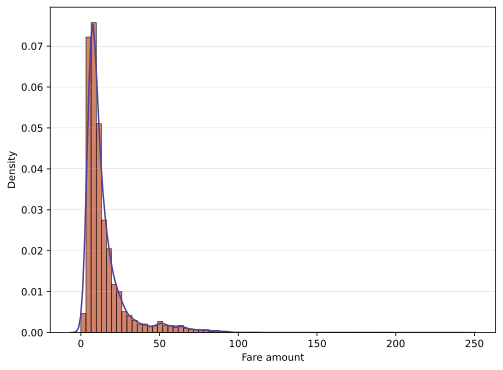

In [73]:
# frequency of fare_amount
plt.figure(figsize=(8, 6))
sns.histplot(con_data_train2['fare_amount'], bins = 75, color ='#c15a3a' , stat='density');
sns.kdeplot(con_data_train2['fare_amount'], color='#533e98');
plt.xlabel('Fare amount');
plt.grid(axis='y', lw = 0.25);

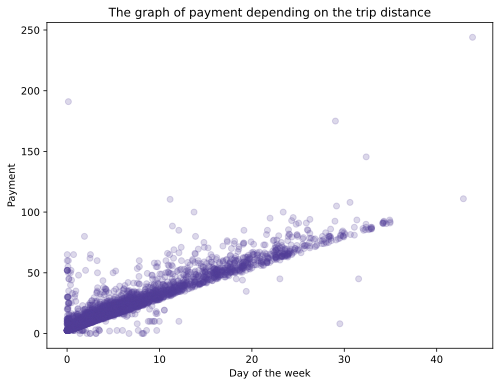

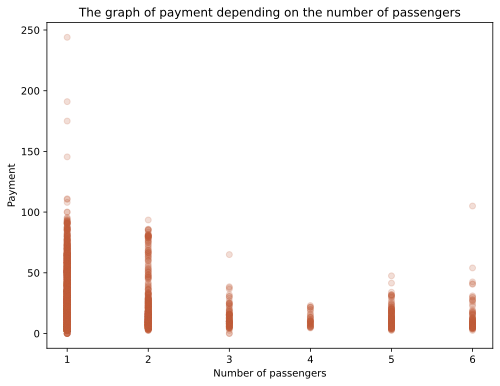

In [74]:
fig1=plt.figure(figsize=(8, 6))
ax5=fig1.add_subplot(1,1,1)
ax5.scatter(con_data_train2.trip_distance, con_data_train2.fare_amount, color='#533e98',alpha=0.2)
ax5.set_title('The graph of payment depending on the trip distance')
ax5.set_xlabel('Day of the week')
ax5.set_ylabel('Payment');

fig2=plt.figure(figsize=(8, 6))
ax5=fig2.add_subplot(1,1,1)
ax5.scatter(con_data_train2.passenger_count, con_data_train2.fare_amount, color='#c15a3a',alpha=0.2)
ax5.set_title('The graph of payment depending on the number of passengers');
ax5.set_xlabel('Number of passengers')
ax5.set_ylabel('Payment');

In [75]:
# # # relationship between hour_dropoff and fare_amount
# # # plot(x = con_data_train2['hour_dropoff'], y = con_data_train2['fare_amount'])
# con_data_train2.plot(x='fare_amount', y=['hour_pickup','hour_dropoff'], kind='barh');

In [76]:
# con_data_train2.plot(x='fare_amount', y=['not_a_store_and_forward_trip','store_and_forward_trip'], kind='barh');

In [77]:
df_product_month = df_train['Month'].value_counts()

label= [df_product_month.index.tolist()]
plt.pie(df_product_month, shadow=True, labels=label[0], explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
        autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)

NameError: name 'df_train' is not defined

In [ ]:
# taxi trip repartition by hour of the day
sns.catplot(x='hour_pickup', kind='count', palette='icefire', data=con_data_train2, height=3, aspect=3);
plt.title('Hour of Day');

In [ ]:
# # taxi trip repartition by pickup month
# sns.catplot(x=['month_pickup','month_dropoff'], kind='count', palette='icefire', data=con_data_train2, height=3, aspect=3);
# plt.title('Pickup Month');

1. Does the number of passengers affect the fare?

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(con_data_train2['passenger_count'], bins=100, color='#533e98' )
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency');

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=con_data_train2['passenger_count'], y=con_data_train2['fare_amount'], s=10, color='#c15a3a',alpha=0.2)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare');

2. Does the time of pickup affect the fare?

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(con_data_train2['hour_pickup'], bins=100, color='#533e98')
plt.xlabel('Hour Pickup')
plt.ylabel('Frequency');

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=con_data_train2['hour_pickup'], y=con_data_train2['fare_amount'], s=10, color='#c15a3a',alpha=0.2)
plt.xlabel('Hour Pickup')
plt.ylabel('Fare');

3. Does the day of the week affect the fare?

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(con_data_train2['week_day_pickup'], bins=100, color='#533e98')
plt.xlabel('Day pickup of Week')
plt.ylabel('Frequency');

 day of the week doesn't seem to have that much of an influence on the number of cab rides.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=con_data_train2['week_day_pickup'], y=con_data_train2['fare_amount'], s=10, color='#c15a3a',alpha=0.2)
plt.xlabel('Day pickup of Week')
plt.ylabel('Fare');

---
## Scaling
scaling the features makes interpretation of regression coefficients easier

In [ ]:
con_data_val.shape

In [ ]:
con_data_train2.shape

In [ ]:
scaler = StandardScaler()

con_data_train2[con_data_train2.columns]=scaler.fit_transform(con_data_train2[con_data_train2.columns])
con_data_val[con_data_val.columns]=scaler.transform(con_data_val[con_data_val.columns])
# con_data_test[con_data_test.columns]=scaler.transform(con_data_test[con_data_test.columns])

X_train=con_data_train2.drop('fare_amount',axis=1)
y_train=con_data_train2['fare_amount']
X_val=con_data_val.drop('fare_amount',axis=1)
y_val=con_data_val['fare_amount']
# X_test=con_data_test.drop('fare_amount',axis=1)
# y_test=con_data_test['fare_amount']

In [ ]:
print("Length of the X_train = ",len(X_train))
print("Length of the y_train = ",len(y_train))
# print("Length of the X_test = ",len(X_test))
# print("Length of the y_test = ",len(y_test))
print("Length of the y_val = ",len(y_val))
print("Length of the y_val = ",len(y_val))

---
### Model Building
Model with all features

In [ ]:
seed = 199
lm = LinearRegression()
lm1 = lm.fit(X_train,y_train)
y_pred_val = lm1.predict(X_val)
y_pred_train = lm1.predict(X_train)
# y_pred_test = lm1.predict(X_test)
print("Score of training set = ",lm1.score(X_train,y_train))

In [ ]:
print("Score of validation set = ",lm1.score(X_val,y_val))

In [ ]:
# from sklearn import metrics
# print('\nLinear Regression Performance Metrics')
# print('R^2=',metrics.explained_variance_score(y_test,y_pred_lm))
# print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lm))
# print('MSE:',metrics.mean_squared_error(y_test,y_pred_lm))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm)))

In [ ]:
y_pred_train.shape

In [ ]:
y_train.shape

In [ ]:
X_train.shape 

In [ ]:
X_val.shape

In [ ]:
y_val.shape

---
## R-squared

In [ ]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_train,y_pred_train)

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y_val,y_pred_val)

In [ ]:
lm.score(X_train,y_train)

In [ ]:
lm.score(X_val,y_val)

---
## Ridge Regularization

In [ ]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

In [ ]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [ ]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(alphalist), err_vec_val);

In [ ]:
np.min(err_vec_val)

In [ ]:
alphalist[np.argmin(err_vec_val)]

---